In [1]:
# Import modules 
import sys
from os import getcwd
from os.path import dirname
path = dirname(dirname(getcwd()))
sys.path.append(path)

In [2]:
from MintPy.interpret_toolkit import InterpretToolkit
from MintPy.utils import combine_top_features
import pandas as pd
import numpy as np
from joblib import load

To demonstrate the utility of MintPy, we are using a XXX dataset. We are loading three pre-fit classifiers from scikit-learn. 

In [3]:
# Define target feature
TARGET_COLUMN = 'cat_rt'

# Load the model objects. In this case, we are using 3 
# popular models availabe in scikit-learn 
model_fname = ['RandomForest.pkl', 'LogisticRegression.pkl', 'GradientBoostingClassifier.pkl']
model_objs = [load(fname) for fname in model_fname]

# Load the training dataset 
data  = pd.read_csv('example_data.csv')
targets = data[TARGET_COLUMN].values

# only want to use these columns below
cols_to_use = ['dllwave_flux', 'dwpt2m', 'fric_vel', 'gflux', 'high_cloud',
            'lat_hf', 'low_cloud', 'mid_cloud', 'sat_irbt', 'sens_hf',
            'sfcT_hrs_ab_frez', 'sfcT_hrs_bl_frez', 'sfc_rough', 'sfc_temp',
            'swave_flux','temp2m', 'tmp2m_hrs_ab_frez', 'tmp2m_hrs_bl_frez',
            'tot_cloud', 'uplwav_flux','vbd_flux', 'vdd_flux','wind10m',
            'date_marker', 'urban','rural','d_ground','d_rad_d','d_rad_u',
            'hrrr_dT']

units = ['W m$^{-2}$', '$^\circ$C', 'm s$^{-1}$', 'W m$^{-2}$', '%', 'W m$^{-2}$', '%', '%', 
         '$^\circ$C', 'W m$^{-2}$', 'hrs', 'hrs', 'unitless','$^\circ$C', 'W m$^{-2}$', '$^\circ$C', 
         'hrs', 'hrs', '%', 'W m$^{-2}$', 'W m$^{-2}$', 'W m$^{-2}$', 'm s$^{-1}$', 'days', 'unitless', 
         'unitless', 'W m$^{-2}$', 'W m$^{-2}$', 'W m$^{-2}$', '$^\circ$C']

pretty_names = [r'$\lambda_{\downarrow}$', '$T_{d}$', '$V_{fric}$', 'Gflux', '$Cloud_{high}$',
 '$Lat_{F}$', '$Cloud_{low}$', '$Cloud_{mid}$', 'IRBT', '$Sens_{F}$',
 'Hours $T_{sfc}$ $> $0', 'Hours $T_{sfc}$ $<= $0', 'SfcRough', '$T_{sfc}$',
 '$I_{S}$', '$T_{2m}$', 'Hours $T_{2m}$ $> $0', 'Hours $T_{2m}$ $<= $0',
 '$Cloud_{Tot}$', r'$\lambda_{\uparrow}$', 'VBD', 'VDD', '10m wind',
 'Date marker', 'Urban', 'Rural', 'Diff1', 'Diff2', 'Diff3',
 '$T_{sfc}$ - $T_{2m}$']

feature_units = {c : u for c,u in zip(cols_to_use, units)}
readable_feature_names = {c : u for c,u in zip(cols_to_use, pretty_names)}

# get predictor subset of dataframe (only the predictors used in training the model)
examples = data[cols_to_use]

/Users/monte.flora/opt/miniconda3/envs/deep/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/monte.flora/opt/miniconda3/envs/deep/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


# Initializing InterpretToolkit

To initialize `InterpretToolkit`, requires a model object (e.g., a trained sci-kit learn model object) or a list of model objects and examples and targets to evalute the model(s) on. `examples` and `targets` can be `pandas.DataFrame` or `numpy.array`, but if you are using arrays, then you must provide the feature names. 

In [4]:
myInterpreter = InterpretToolkit(model=model_objs[0], 
                             examples=examples, 
                             targets=targets,
                                )

In [5]:
important_vars = ['dllwave_flux', 'dwpt2m', 'sfc_temp', 'temp2m', 'uplwav_flux']

# Partial Dependence Plots

Once we known what features are important, we explore their functional relationship with the target variable. MintPy has a built-in function to take the important features from multiple model turn it into a single list with any duplicate features removed. 

Using 3 processors...


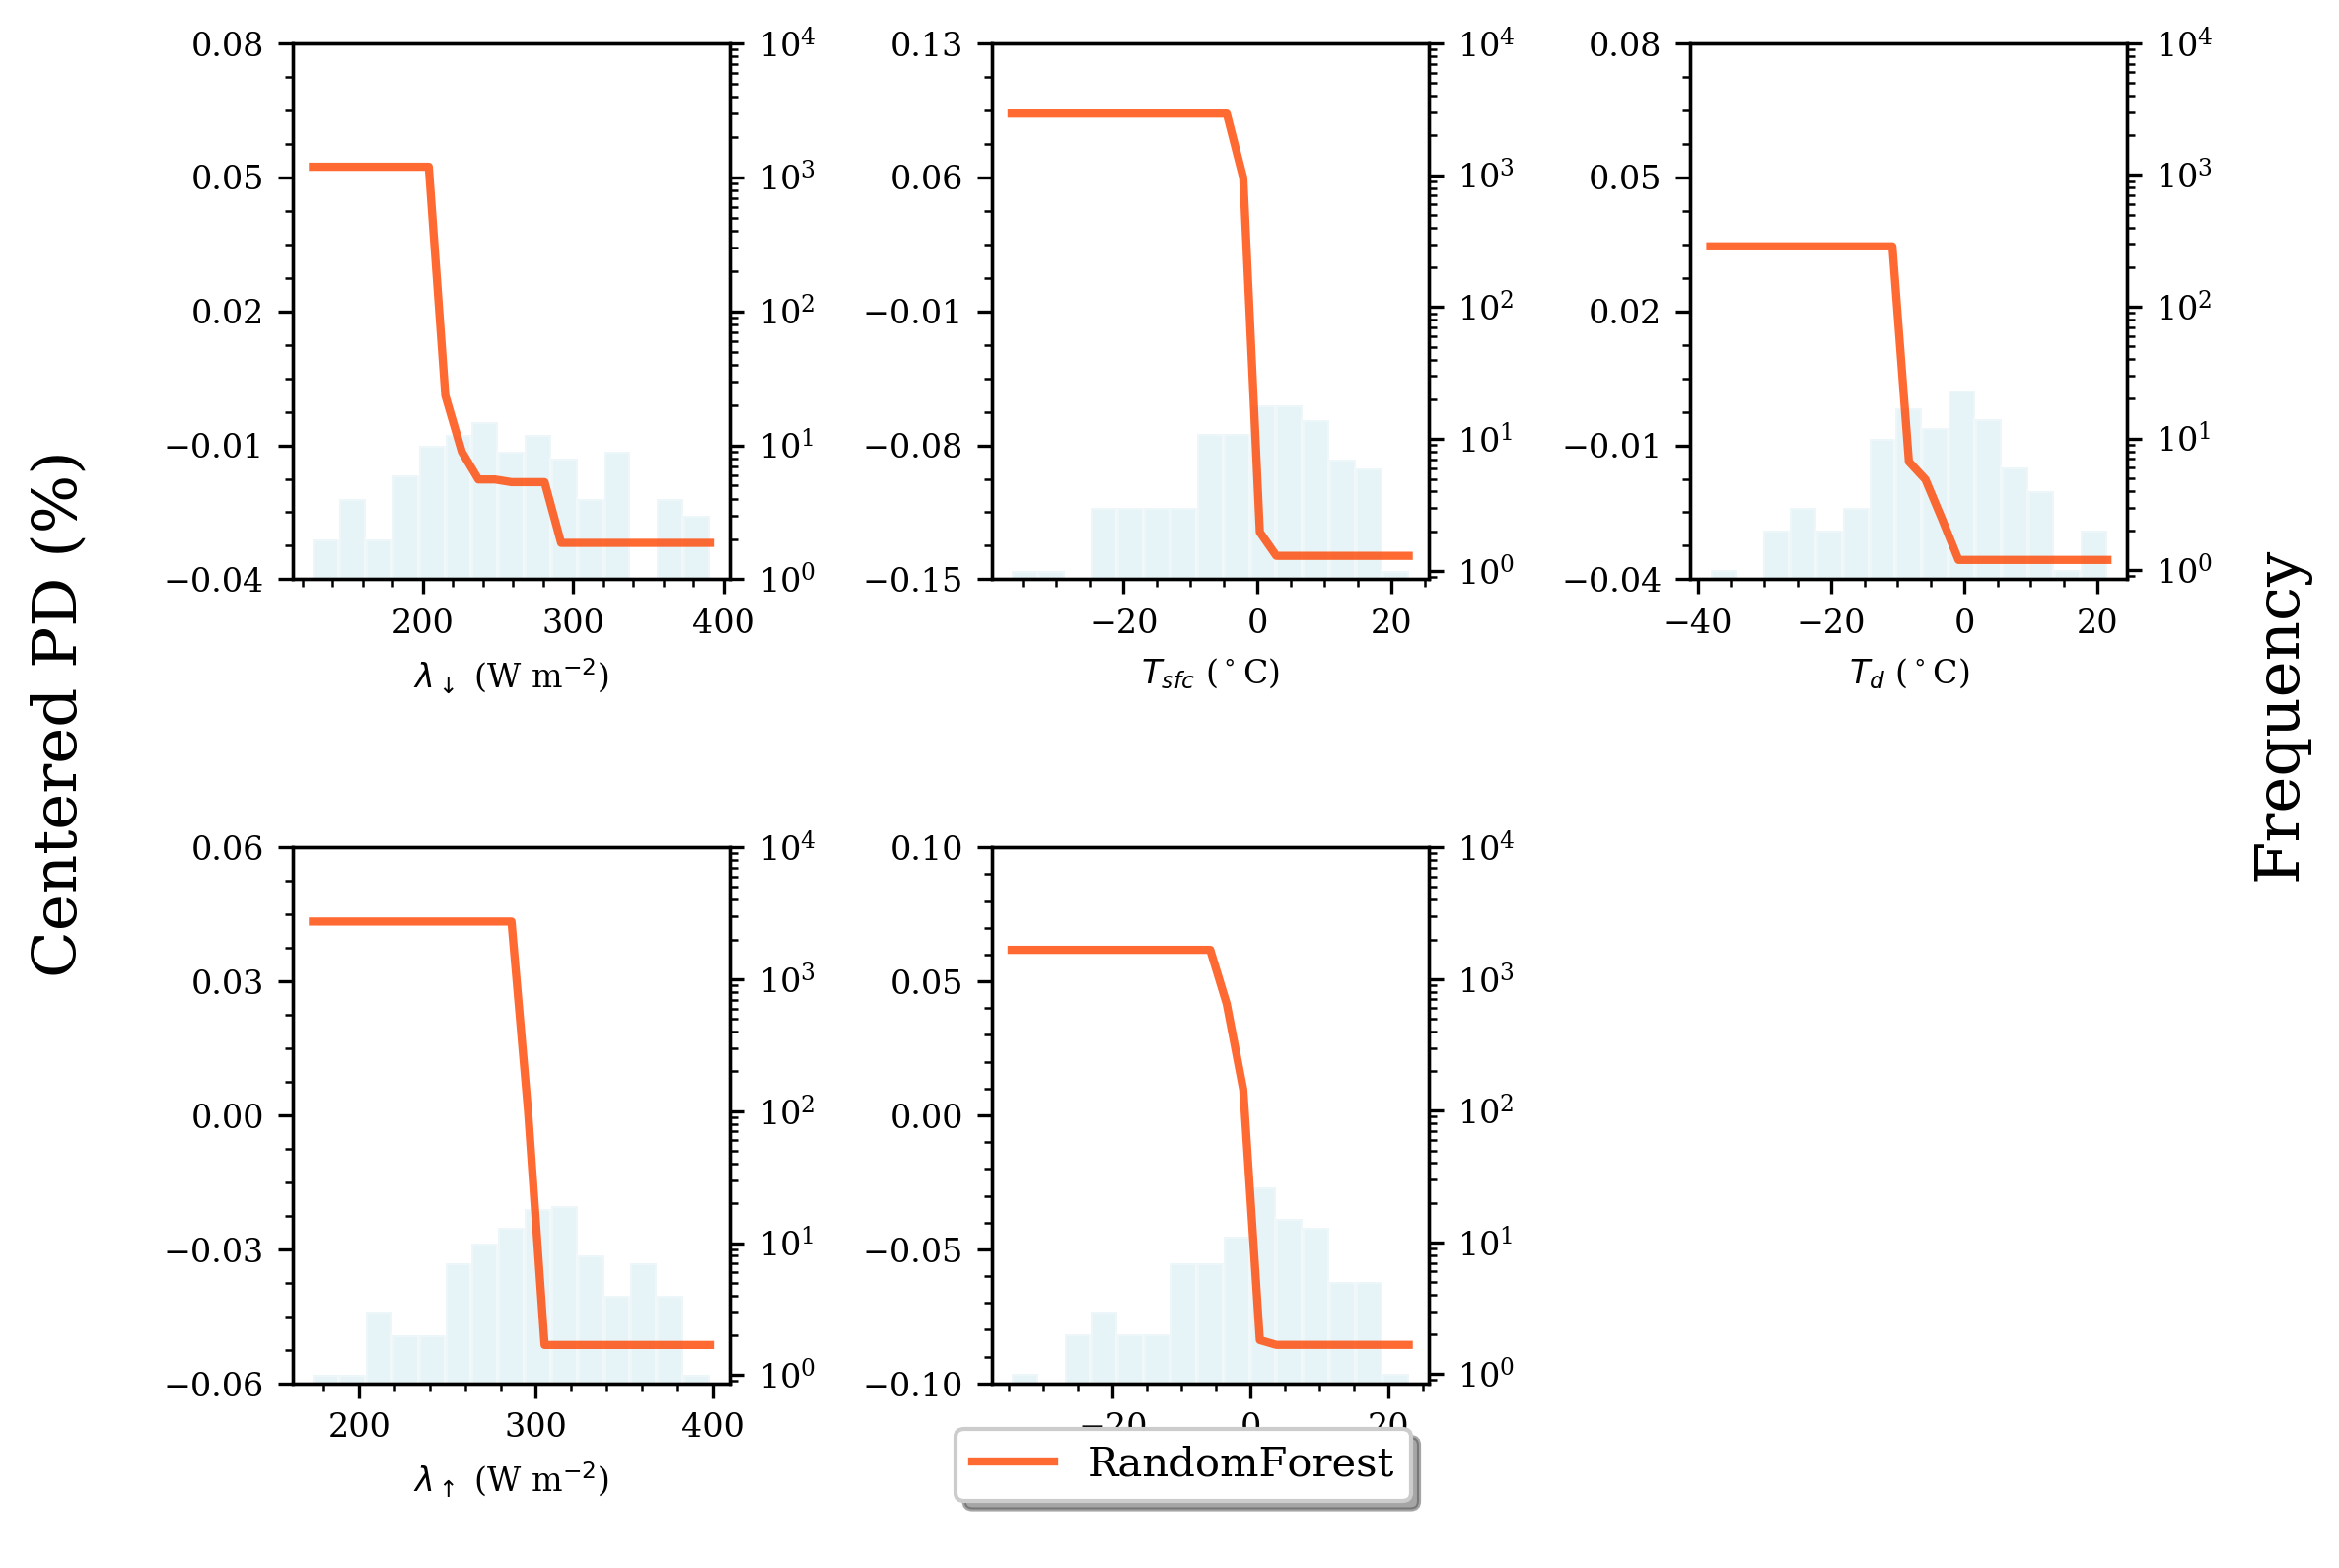

In [6]:
myInterpreter.calc_pd(features=important_vars, nbootstrap=1, subsample=1.0, njobs=3)
fig, axes = myInterpreter.plot_pd(feature_units=feature_units,
                                 readable_feature_names=readable_feature_names)

# Accumulated Local Effect

Using 3 processors...
starting calculations...starting calculations...

starting calculations...
starting calculations...
starting calculations...


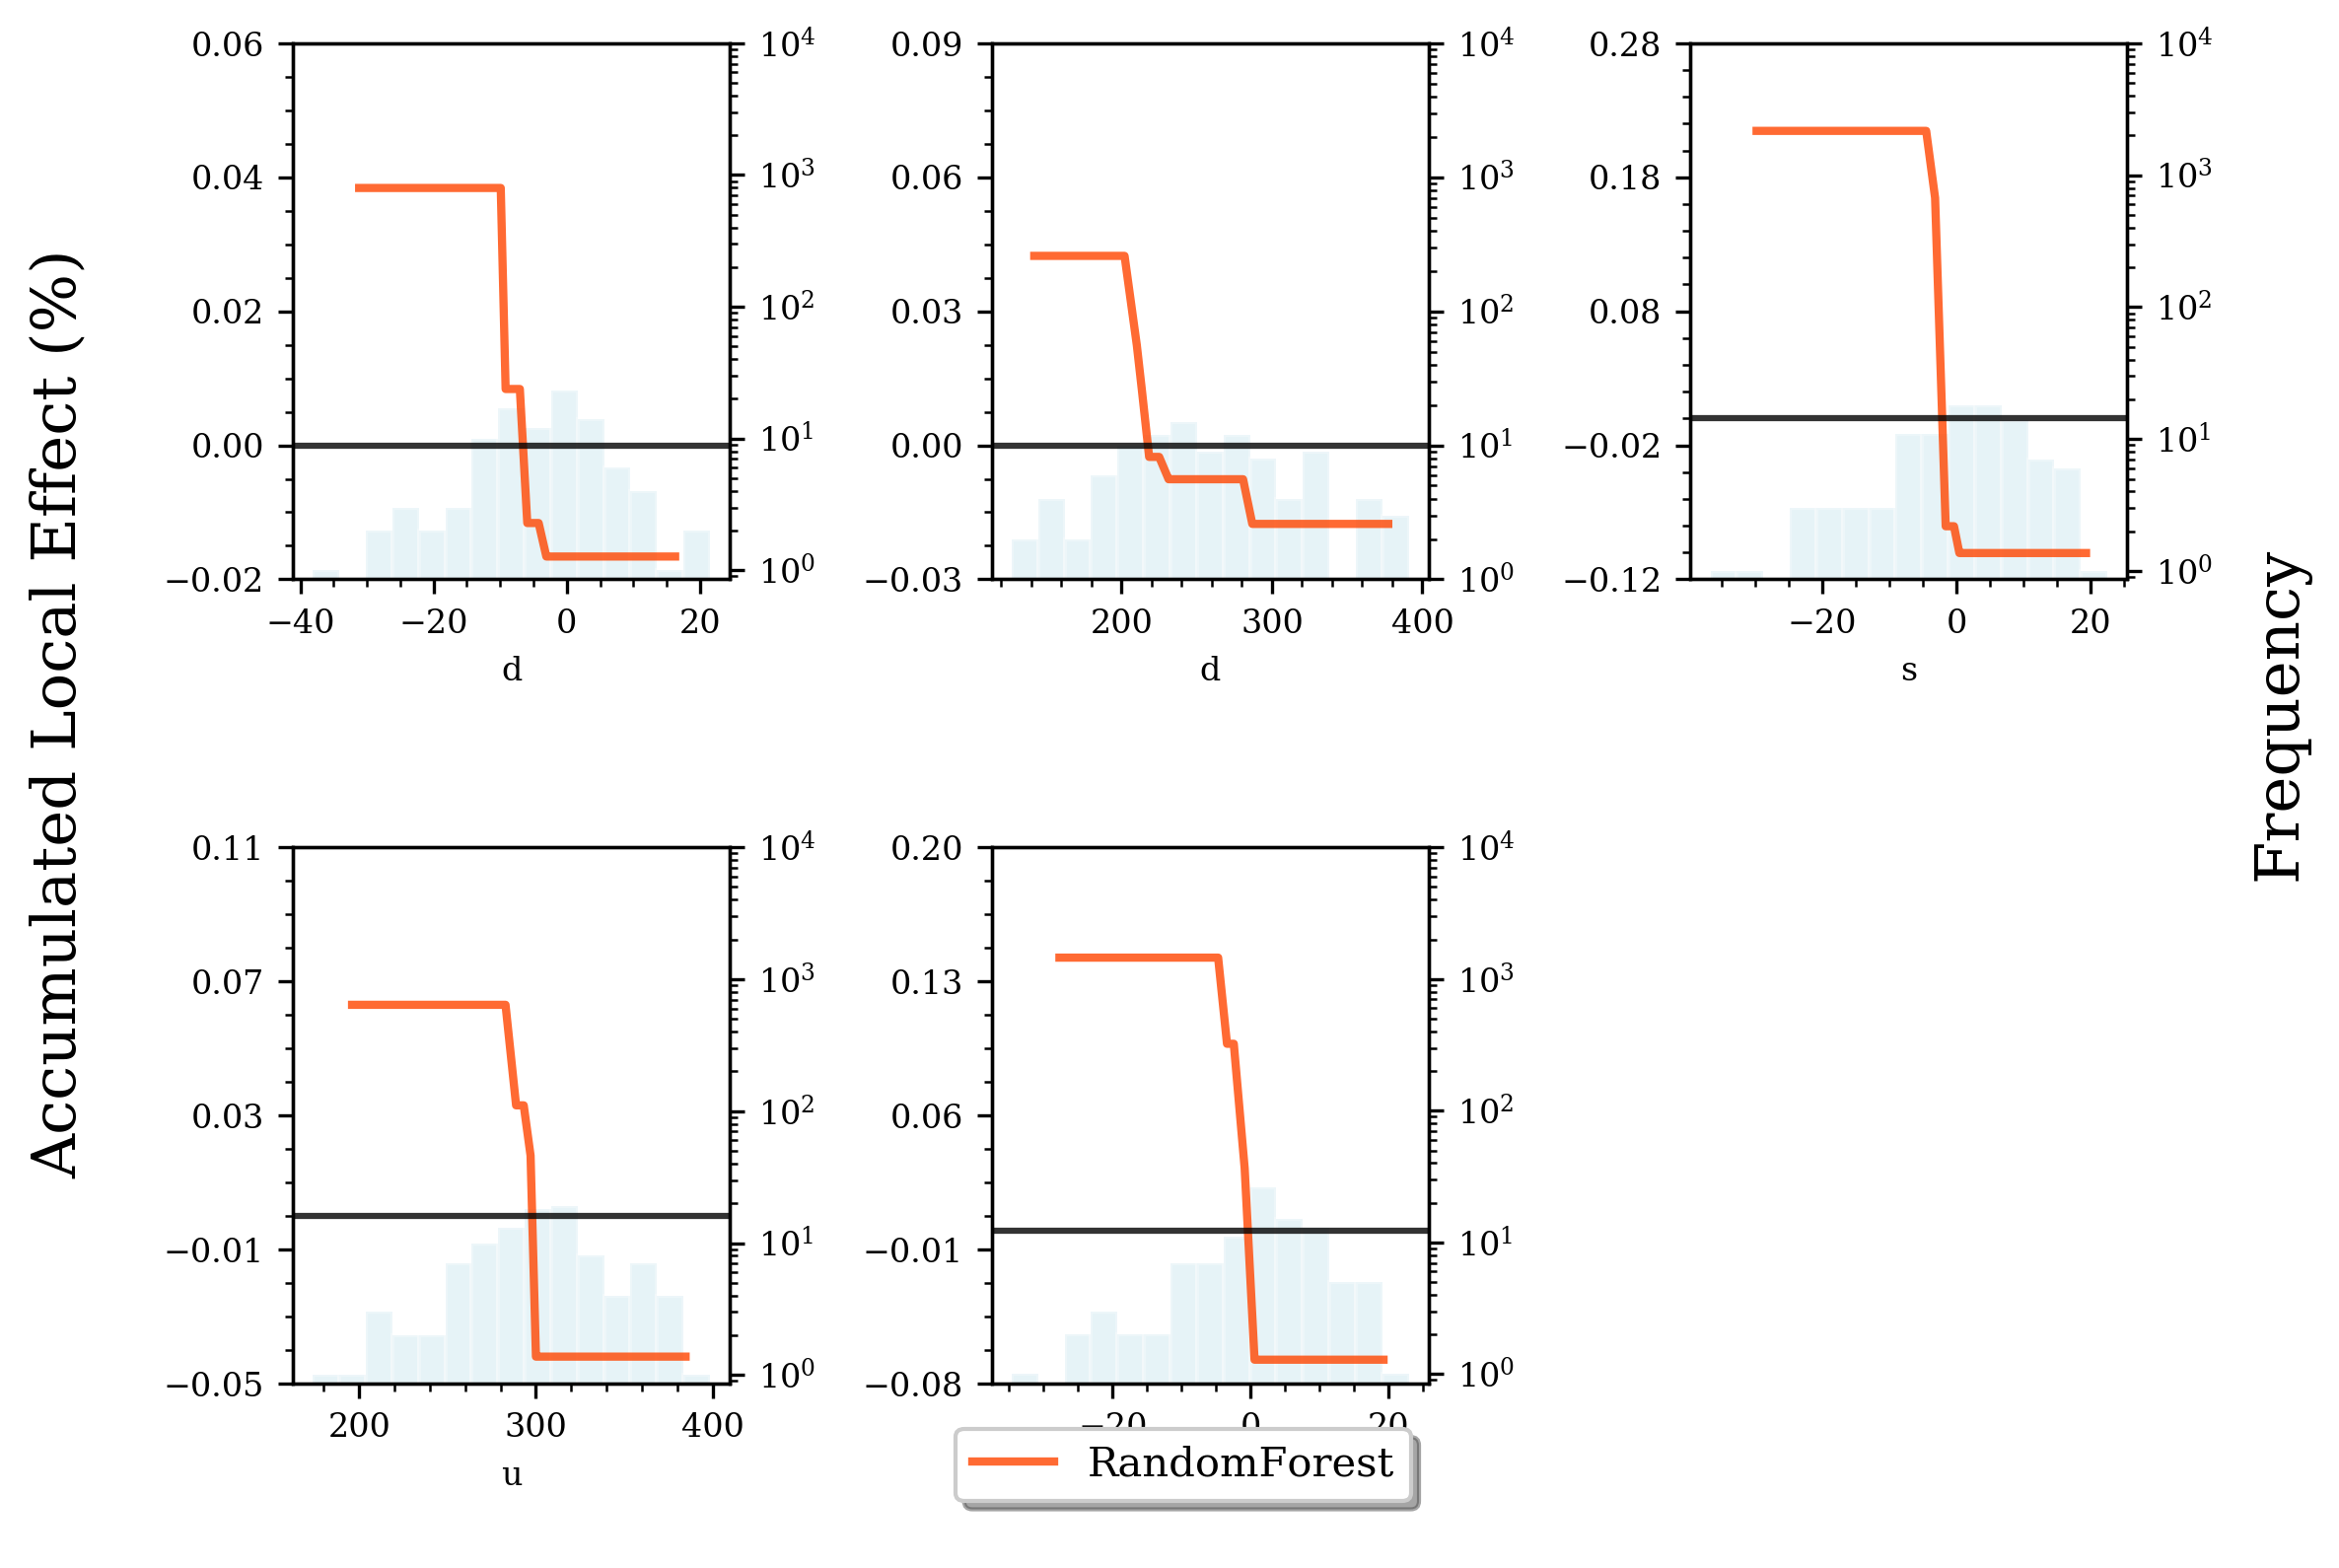

In [8]:
myInterpreter.calc_ale(features=important_vars, nbootstrap=1, subsample=1.0, njobs=3)
fig, axes = myInterpreter.plot_ale(feature_units=feature_units,
                                 readable_feature_names=readable_feature_names)

# Feature Contributions (Random Forest Only)

For random forest, it is possible to breakdown a prediction into a series of contributions from the predictors. 

In [ ]:
out_dict = myInterpreter.run_tree_interpreter(performance_based=True, n_examples=5)

In [ ]:
fig = myInterpreter.plot_tree_interpreter(readable_feature_names=readable_feature_names)

# Second-order PDP and ALE 

In [ ]:
feature_tuple = [('dllwave_flux', 'fric_vel'), ('dwpt2m', 'fric_vel'), ('gflux', 'high_cloud')]
myInterpreter.run_pd(features=feature_tuple, nbootstrap=1, subsample=1.0, njobs=3)
fig, axes = myInterpreter.plot_pd(feature_units=feature_units,
                                readable_feature_names=readable_feature_names)

In [ ]:
feature_tuple = [('dllwave_flux', 'dwpt2m'),('dwpt2m', 'fric_vel'), ('gflux', 'high_cloud')]
myInterpreter.run_ale(features=feature_tuple, nbootstrap=1, subsample=1.0, njobs=3)
fig, axes = myInterpreter.plot_ale(feature_units=feature_units,
                                 readable_feature_names=readable_feature_names)